<h1> <center> AMOD-5610: Big Data Major Research Paper </center> </h1>
<h2> <center> Fraud Detection in Financial Transactions </center> </h2>

<br>


Submitted By:-

**Jasmeet Singh Saini** (**0758054**)

**Ayush Sharma**  (**0774583**)


### Import necessary libraries


In [69]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Load the dataset


In [46]:
def load_dataset(file_path):
    try:
        # Load the dataset
        dataset = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        return dataset
    except Exception as e:
        print(f"Error loading the dataset: {e}")
        return None

Here, the data was loaded.

In [47]:
file_path = 'financial_transactions_dataset.csv'
df         = load_dataset(file_path)

Dataset loaded successfully.


### Dataset

Display the first few rows of the dataset to get an overview

In [48]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


### Rows and Columns

There are **6362620 rows** and **11 columns** present in data set i.e., before cleaning.

In [49]:
df.shape

(6362620, 11)

### Exploring the variables

Exploring the *datatypes* and *number of instances* in the dataset

In [50]:
print(df.type.value_counts())
print('-------------------------------------------------------')
print(df.isFraud.value_counts())
print('-------------------------------------------------------')

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
-------------------------------------------------------
isFraud
0    6354407
1       8213
Name: count, dtype: int64
-------------------------------------------------------


CASH_OUT and PAYMENT has **higher data points**. 

DEBIT has the **lowest data points**.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Let's break down each column which is provided in the dataset:

**1. step:** It represents a unit of time in the real world, where 1 step is equivalent to 1 hour. It has values like 1, 2, 3, ..., 744 (for a 30-day simulation).

**2. type:** It categorizes the type of transaction. And the type are like PAYMENT, TRANSFER, CASH-IN, CASH-OUT, DEBIT.

**3. amount:** It denotes the amount of the transaction in the local currency. It has values like  9839.64, 1864.28, 181, ...

**4. nameOrig:** It represents the customer who initiated the transaction. It has values like C1231006815, C1666544295, ...

**6. oldbalanceOrg:** It signifies the initial balance of the originator's account before the transaction. It has values like 170136, 21249, 181, ...

**7. newbalanceOrig:** It reflects the new balance of the originator's account after the transaction.It has values like 160296.36, 19384.72, 0, ...

**8. nameDest:** It represents the customer who is the recipient of the transaction. It has values like M1979787155, M2044282225, C553264065, ...

**9. oldbalanceDest:** Indicates the initial balance of the recipient's account before the transaction.
Example: 0, 0, 0, 21182, 0, ...

**10. newbalanceDest:** Denotes the new balance of the recipient's account after the transaction.
Example: 0, 0, 0, 0, 0, ...

**11. isFraud:** It identifies transactions made by fraudulent agents within the simulation. And the values like **0** means *Not fraud*, **1** means *Fraud*.

**12. isFlaggedFraud:** It reflects whether the transaction is flagged as illegal based on the business model. And it has values like **0** (Not flagged as fraud), **1** (Flagged as fraud).


###  Data types in the dataset


In [52]:
# Count of types of data type
df.dtypes.value_counts()

float64    5
int64      3
object     3
Name: count, dtype: int64

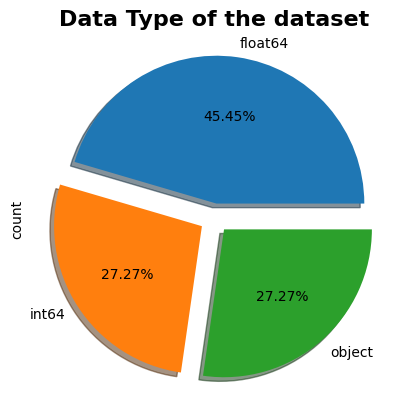

In [53]:
df.dtypes.value_counts().plot.pie(explode = [0.1,0.1,0.1],autopct = '%1.2f%%',shadow = True)
plt.title('Data Type of the dataset', fontweight = 'bold', fontsize = 16);

There is **3 Integer (27.27%)**, **3 Object (27.27%)**, and **5 Float (45.45%)** are present before pre-processing of dataset.

### Check basic statistics of the dataset

Let's have a look to the description of the dataset

In [54]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


### Na Values


In [55]:
missing_values  = df.isnull().sum()
print("\nThe total NULL values in the dataset are", missing_values.sum())

print("\nThe missing values and the percentage of missing in each columns are given below:-")
# df.isnull().sum()

percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values' : missing_values,
    'percent_missing': percent_missing
}
frame = pd.DataFrame(value)
frame


The total NULL values in the dataset are 0

The missing values and the percentage of missing in each columns are given below:-


,missing_values,percent_missing
step,0,0.0
type,0,0.0
amount,0,0.0
nameOrig,0,0.0
oldbalanceOrg,0,0.0
newbalanceOrig,0,0.0
nameDest,0,0.0
oldbalanceDest,0,0.0
newbalanceDest,0,0.0
isFraud,0,0.0


### Duplicates

Checking the Duplicates in the dataset.

In [56]:
print("\nThe total Duplicates values in the dataset are", df.duplicated().sum()) 


The total Duplicates values in the dataset are 0


### Numerical values:-


In [57]:
numerical_cols = [f for f in df.columns if df.dtypes[f] != 'object']
print("The numirical values in the dataset are given below:- \n",numerical_cols)

The numirical values in the dataset are given below:- 
 ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


### Categorical Values:-


In [58]:
cat_columns = [f for f in df.columns if df.dtypes[f] == 'object']
cat_columns.remove('nameOrig')
cat_columns.remove('nameDest')
print("The Categorical values in the dataset are given below:- \n",cat_columns)

The Categorical values in the dataset are given below:- 
 ['type']


### Checking columns names

In [59]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Rename the Columns

Changing the names of the columns for better understanding.

In [60]:
# Define a dictionary with the mapping of old column names to new column names (for better naming convention).
column_mapping = {
    'step'                       : 'step',
    'type'                       : 'type',
    'amount'                     : 'amount',
    'nameOrig'                   : 'origin',
    'oldbalanceOrg'              : 'sender_old_balance', 
    'newbalanceOrig'             : 'sender_new_balance', 
    'nameDest'                   : 'destination', 
    'oldbalanceDest'             : 'receiver_old_balance', 
    'newbalanceDest'             : 'receiver_new_balance', 
    'isFraud'                    : 'isfraud',
    'isFlaggedFraud'             : 'isFlaggedFraud'
}


# Rename the columns in the DataFrame
df.rename(columns = column_mapping, inplace = True)

# Display the updated DataFrame
df.head(5)


,step,type,amount,origin,sender_old_balance,sender_new_balance,destination,receiver_old_balance,receiver_new_balance,isfraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


###  Removing Non-Essential Columns

It's advisable to remove non-essential columns from a dataset, and we can achieve this by utilizing the drop function:-

- step, and 

- isFlaggedFraud.

In [61]:
df = df.drop(
    columns = ['step', 'isFlaggedFraud'], 
    axis    = 'columns'
)

### Relocating Target Column

Now, we are ready to relocate the target column to the preferred position within the dataset.

In [62]:
cols         = df.columns.tolist()
new_position = 3

cols.insert(new_position, cols.pop(cols.index('destination')))
df           = df[cols]

By employing the head function again, let's confirm the modifications made thus far.

In [63]:
df.head(5)

,type,amount,origin,destination,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud
0,PAYMENT,9839.64,C1231006815,M1979787155,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,C1666544295,M2044282225,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,C1305486145,C553264065,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,C840083671,C38997010,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,C2048537720,M1230701703,41554.0,29885.86,0.0,0.0,0


## Exploratory Data Analysis

### Correlation heatmap


In [71]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print(correlation_matrix)

                        amount  sender_old_balance  sender_new_balance  \
amount                1.000000           -0.002762           -0.007861   
sender_old_balance   -0.002762            1.000000            0.998803   
sender_new_balance   -0.007861            0.998803            1.000000   
receiver_old_balance  0.294137            0.066243            0.067812   
receiver_new_balance  0.459304            0.042029            0.041837   
isfraud               0.076688            0.010154           -0.008148   

                      receiver_old_balance  receiver_new_balance   isfraud  
amount                            0.294137              0.459304  0.076688  
sender_old_balance                0.066243              0.042029  0.010154  
sender_new_balance                0.067812              0.041837 -0.008148  
receiver_old_balance              1.000000              0.976569 -0.005885  
receiver_new_balance              0.976569              1.000000  0.000535  
isfraud            

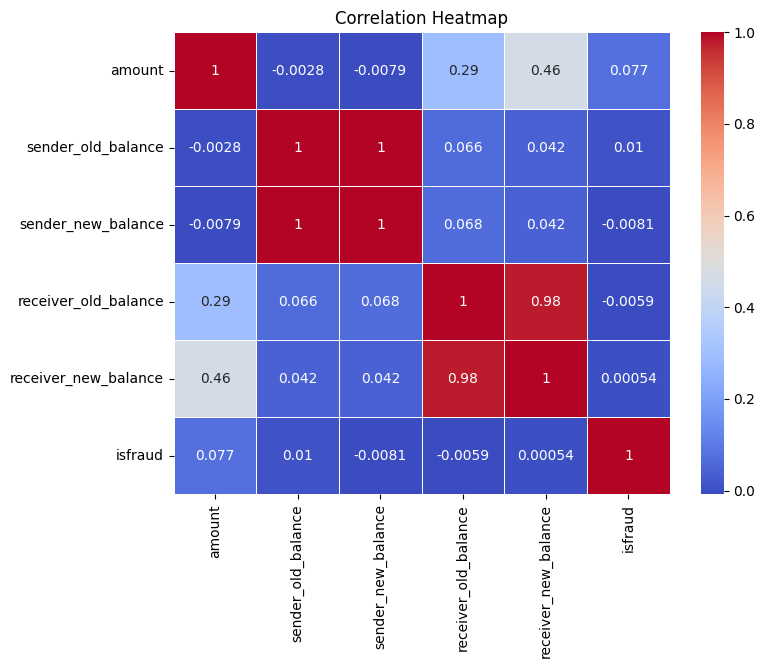

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation matrix:

**1. Transaction Amount:** Transaction amounts have a *positive correlation* with the balances of the receiver. Larger transaction amounts are associated with higher receiver balances.

**2. Balances:** Strong *positive correlation* between the sender's old and new balances (who has started the transaction). Weak positive correlations between sender balances and receiver balances was observed.

**3. Fraud:** *Very weak correlations* between fraud and other columns, with the *highest correlation* being with the transaction amount. The observed correlations are not strong, suggesting that linear relationships are minimal.

Correlation does not imply causation, and further analysis may be required for a comprehensive understanding of relationships in the data.

### Skewness

In [83]:
numeric_df.skew()

amount                  30.993949
sender_old_balance       5.249136
sender_new_balance       5.176884
receiver_old_balance    19.921758
receiver_new_balance    19.352302
isfraud                 27.779538
dtype: float64

- The *amount* is **Highly right-skewed (positively skewed)**. Also, *receiver_old_balance*, *receiver_new_balance* and *isfraud* are **Highly right-skewed**.

- *sender_old_balance* and *sender_new_balance* are **moderately right-skewed**.


Hence, the financial transaction data exhibits **right-skewness**, indicating a concentration of lower values in the balances and amounts, with a few higher values or fraudulent cases having a substantial impact on the overall distribution.

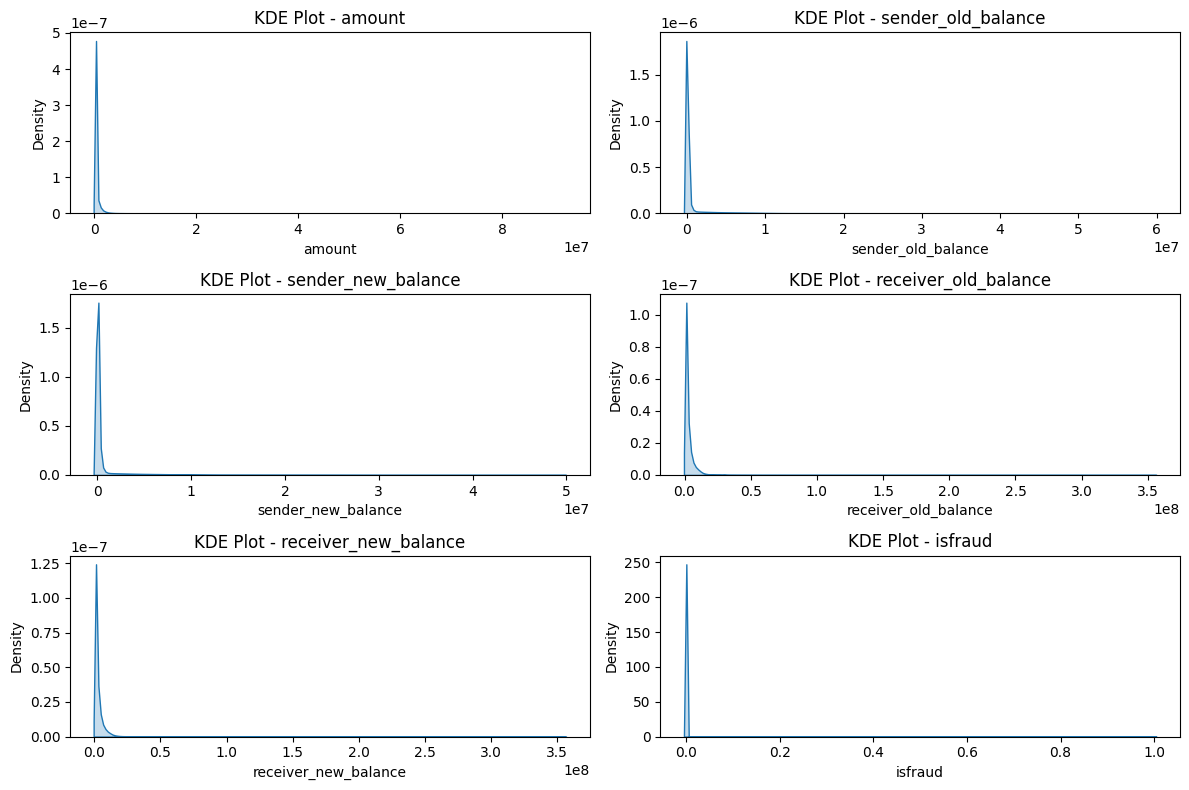

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with the specified columns and data
numeric_columns = ['amount', 'sender_old_balance', 'sender_new_balance', 'receiver_old_balance', 'receiver_new_balance', 'isfraud']
numeric_df = df[numeric_columns]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Loop through each numeric column and create a KDE plot
for i, column in enumerate(numeric_df.columns):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(data=numeric_df, x=column, fill=True, common_norm=False, palette='darkblue')
    plt.title(f'KDE Plot - {column}')

plt.tight_layout()
plt.show()


### Fraud and Non Fraud Transactions

Now, we will create a bar plot to visualize the distribution of fraud and non-fraud transactions across different transaction types.

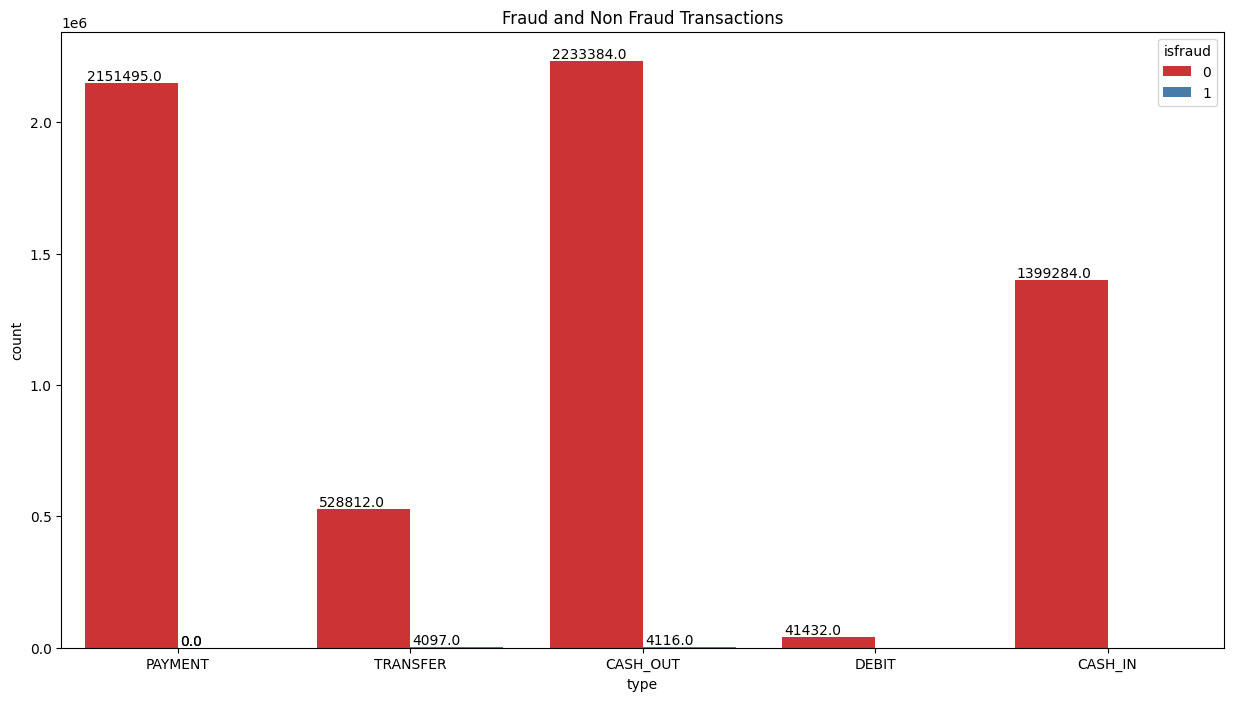

In [100]:
plt.figure(figsize = (15, 8))
ax=sns.countplot(data = df, x = "type", hue="isfraud", palette = 'Set1')
plt.title('Fraud and Non Fraud Transactions')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

In [8]:
import os

notebook_path = os.getcwd()
print(notebook_path)

C:\Users\jasme\Documents\work_space\AMOD-5610_Big_Data_Major_Research_Paper
